In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [14]:
np.random.seed(42)
num_houses=100
square_feet=np.random.randint(800,4000,num_houses)
num_rooms=np.random.randint(2,6,num_houses)
house_prices=square_feet*200+num_rooms*10000+np.random.randn(num_houses)*50000

In [15]:
df=pd.DataFrame({'SquareFeet':square_feet,'Rooms':num_rooms,'Price':house_prices})

In [16]:
X=df[['SquareFeet','Rooms']]
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error with Ridge Penalization:{mse:.2f}")

Mean Squared Error with Ridge Penalization:2589844904.05


In [21]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear=linear_model.predict(X_test)
mse_linear=mean_squared_error(y_test,y_pred_linear)
print(f"Mean Squared Error without Penalization:{mse_linear:.2f}")

Mean Squared Error without Penalization:2589506051.95


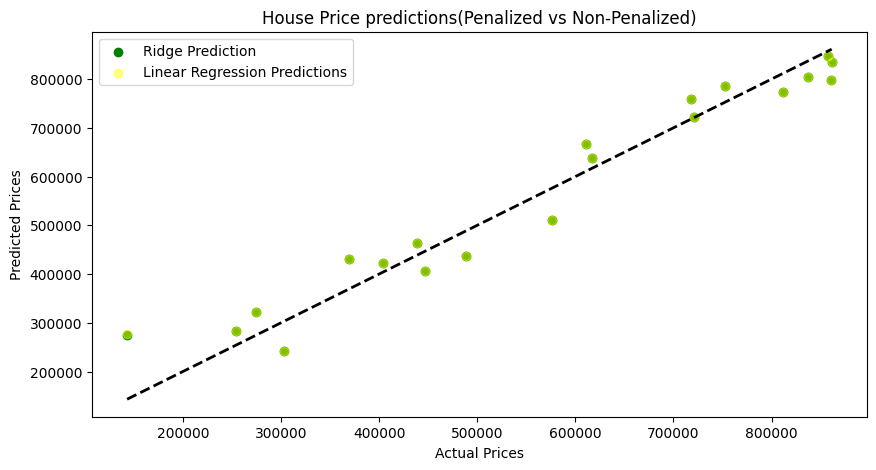

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,color='green',label='Ridge Prediction')
plt.scatter(y_test,y_pred_linear,color='yellow',label='Linear Regression Predictions',alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'k--',lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("House Price predictions(Penalized vs Non-Penalized)")
plt.show()